<a href="https://colab.research.google.com/github/Suchada2000/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

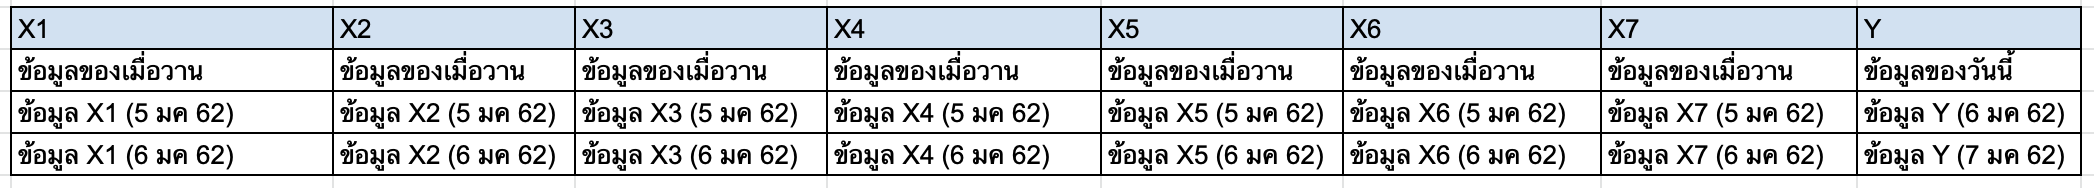

นำข้อมูลเข้า

In [473]:
import pandas as pd
import os

In [474]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ความกด

In [475]:
data_ความกด_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/ความกดขอนแก่น.xlsx')

In [476]:
data_ความกด_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/ความกดนครพนม.xlsx')

In [477]:
data_ความกด_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/ความกดสกลนคร.xlsx')

In [478]:
data_ความกด_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/ความกดหนองคาย.xlsx')

In [479]:
data_ความกด_เลย = pd.read_excel('/content/drive/MyDrive/mid/ความกดเลย.xlsx')

ความชื้น

In [480]:
data_ความชื้น_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/ความชื้นขอนแก่น.xlsx')

In [481]:
data_ความชื้น_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/ความชื้นนครพนม.xlsx')

In [482]:
data_ความชื้น_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/ความชื้นสกลนคร.xlsx')

In [483]:
data_ความชื้น_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/ความชื้นหนองคาย.xlsx')

In [484]:
data_ความชื้น_เลย = pd.read_excel('/content/drive/MyDrive/mid/ความชื้นเลย.xlsx')

ลม

In [485]:
data_ลม_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/ลมขอนแก่น.xlsx')

In [486]:
data_ลม_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/ลมนครพนม.xlsx')

In [487]:
data_ลม_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/ลมสกลนคร.xlsx')

In [488]:
data_ลม_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/ลมหนองคาย.xlsx')

In [489]:
data_ลม_เลย = pd.read_excel('/content/drive/MyDrive/mid/ลมเลย.xlsx')

เมฆ

In [490]:
data_เมฆ_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/เมฆขอนแก่น.xlsx')

In [491]:
data_เมฆ_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/เมฆนครพนม.xlsx')

In [492]:
data_เมฆ_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/เมฆสกลนคร.xlsx')

In [493]:
data_เมฆ_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/เมฆหนองคาย.xlsx')

In [494]:
data_เมฆ_เลย = pd.read_excel('/content/drive/MyDrive/mid/เมฆเลย.xlsx')

ฝน

In [495]:
data_ฝน_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/ฝนขอนแก่น.xlsx')

In [496]:
data_ฝน_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/ฝนนครพนม.xlsx')

In [497]:
data_ฝน_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/ฝนสกลนคร.xlsx')

In [498]:
data_ฝน_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/ฝนหนองคาย.xlsx')

In [499]:
data_ฝน_เลย = pd.read_excel('/content/drive/MyDrive/mid/ฝนเลย.xlsx')

น้ำค้าง

In [500]:
data_น้ำค้าง_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/น้ำค้างขอนแก่น.xlsx')

In [501]:
data_น้ำค้าง_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/น้ำค้างนครพนม.xlsx')

In [502]:
data_น้ำค้าง_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/น้ำค้างสกลนคร.xlsx')

In [503]:
data_น้ำค้าง_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/น้ำค้างหนองคาย.xlsx')

In [504]:
data_น้ำค้าง_เลย = pd.read_excel('/content/drive/MyDrive/mid/น้ำค้างเลย.xlsx')

อุณหภูมิต่ำสุด

In [505]:
data_อุณหภูมิต่ำสุด_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/อุณหภูมิต่ำสุดขอนแก่น.xlsx')

In [506]:
data_อุณหภูมิต่ำสุด_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/อุณหภูมิต่ำสุดนครพนม.xlsx')

In [507]:
data_อุณหภูมิต่ำสุด_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/อุณหภูมิต่ำสุดสกลนคร.xlsx')

In [508]:
data_อุณหภูมิต่ำสุด_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/อุณหภูมิต่ำสุดหนองคาย.xlsx')

In [509]:
data_อุณหภูมิต่ำสุด_เลย = pd.read_excel('/content/drive/MyDrive/mid/อุณหภูมิต่ำสุดเลย.xlsx')

ตุ้มแห้ง

In [510]:
data_ตุ้มแห้ง_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/ตุ้มแห้งขอนแก่น.xlsx')

In [511]:
data_ตุ้มแห้ง_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/ตุ้มแห้งนครพนม.xlsx')

In [512]:
data_ตุ้มแห้ง_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/ตุ้มแห้งสกลนคร.xlsx')

In [513]:
data_ตุ้มแห้ง_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/ตุ้มแห้งหนองคาย.xlsx')

In [514]:
data_ตุ้มแห้ง_เลย = pd.read_excel('/content/drive/MyDrive/mid/ตุ้มแห้งเลย.xlsx')

head ความกด

In [515]:
data_ความกด_ขอนแก่น.head()

,ความกด(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.00,25.00,26.00,27.00,28.00,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645


In [516]:
data_ความกด_นครพนม.head()

,ความกด(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.00,25.00,26.00,27.00,28.00,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1006.3,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839


In [517]:
data_ความกด_สกลนคร.head()

,ความกด(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.สกลนคร,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.0,25.00,26.00,27.00,28.00,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.8,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258


In [518]:
data_ความกด_หนองคาย.head()

,ความกด(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.00,25.00,26.00,27.0,28.00,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.5,1012.81,1011.88,1011.77,1012.18,1010.580645


In [519]:
data_ความกด_เลย.head()

,ความกด(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.00,25.00,26.00,27.0,28.00,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.0,1012.74,1011.69,1011.27,1011.71,1010.343871


head ความชื้น

In [520]:
data_ความชื้น_ขอนแก่น.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,83,92.0,86.0,80.0,86.0,86.0,83.0,...,73.0,72.0,73.0,69.0,69.0,75.0,71,71,68,79


In [521]:
data_ความชื้น_นครพนม.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,357201-นครพนม จ.นครพนม,2011-10-01 00:00:00,95,84.0,74.0,72.0,87.0,88.0,81.0,...,66.0,67.0,70.0,69.0,71.0,66.0,72,70,69,77


In [522]:
data_ความชื้น_สกลนคร.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,356201-สกลนคร จ.สกลนคร,2011-10-01 00:00:00,87,88.0,77.0,75.0,87.0,86.0,81.0,...,74.0,73.0,73.0,72.0,72.0,70.0,74,73,72,78


In [523]:
data_ความชื้น_หนองคาย.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,89,91.0,78.0,75.0,90.0,88.0,87.0,...,76.0,73.0,68.0,71.0,70.0,71.0,70,66,68,76


In [524]:
data_ความชื้น_เลย.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,90,95.0,92.0,89.0,86.0,94.0,90.0,...,85.0,86.0,83.0,84.0,85.0,85.0,82,83,85,87


head ลม

In [525]:
data_ลม_ขอนแก่น.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,3,2.0,3,2.0,2.0,3.0,4.0,...,2.0,3.0,5.0,5.0,5.0,4.0,6,4,5,3.354839


In [526]:
data_ลม_นครพนม.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5,6.0,7,...,23.0,24,25,26.0,27.0,28,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,1.0,2.0,2,1,0.0,2,...,1.0,2,2,1.0,2.0,2,1,1,1,1.322581


In [527]:
data_ลม_สกลนคร.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.สกลนคร,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,1.0,2.0,2,1.0,0.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1,1,1,1.322581


In [528]:
data_ลม_หนองคาย.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,4.0,4.0,2,1.0,3.0,1.0,...,2.0,2.0,3.0,3.0,3.0,3.0,3,3,4,2.580645


In [529]:
data_ลม_เลย.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5,6.0,7.0,...,23.0,24,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,2,2.0,3.0,2.0,3,2.0,1.0,...,1.0,1,2.0,2.0,1.0,2.0,2,2,1,1.612903


head ลม

In [530]:
data_ลม_ขอนแก่น.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,3,2.0,3,2.0,2.0,3.0,4.0,...,2.0,3.0,5.0,5.0,5.0,4.0,6,4,5,3.354839


In [531]:
data_ลม_นครพนม.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5,6.0,7,...,23.0,24,25,26.0,27.0,28,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,1.0,2.0,2,1,0.0,2,...,1.0,2,2,1.0,2.0,2,1,1,1,1.322581


In [532]:
data_ลม_สกลนคร.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.สกลนคร,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,1.0,2.0,2,1.0,0.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1,1,1,1.322581


In [533]:
data_ลม_หนองคาย.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,4.0,4.0,2,1.0,3.0,1.0,...,2.0,2.0,3.0,3.0,3.0,3.0,3,3,4,2.580645


In [534]:
data_ลม_เลย.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5,6.0,7.0,...,23.0,24,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,2,2.0,3.0,2.0,3,2.0,1.0,...,1.0,1,2.0,2.0,1.0,2.0,2,2,1,1.612903


head เมฆ

In [535]:
data_เมฆ_ขอนแก่น.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,9,10.0,10,8.0,10.0,10.0,10.0,...,2.0,3.0,5.0,3.0,3.0,5.0,4,2,2,6.322581


In [536]:
data_เมฆ_นครพนม.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26.0,27,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,10,7,8,8,10,10,9,...,2,2,2,2.0,3,3.0,4,2,4,5.903226


In [537]:
data_เมฆ_สกลนคร.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.สกลนคร,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871


In [538]:
data_เมฆ_หนองคาย.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645


In [539]:
data_เมฆ_เลย.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ตัดcolumnที่เป็นNaN

In [571]:
data_เมฆ_เลย = data_เมฆ_เลย.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])

In [572]:
data_เมฆ_เลย.head()

,จำนวนเมฆ(10ส่วน),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,8,10.0,10.0,9.0,8.0,10.0,10.0,...,1.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,5.387097


head ฝน

In [573]:
data_ฝน_ขอนแก่น.head()

,ปริมาณฝน(มิลลิเมตร),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3,4,5,6,7,...,23,24,25,26,27,28.0,29.0,30,31,NaN
4,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0.0,0,0,176.8


In [574]:
data_ฝน_นครพนม.head()

,ปริมาณฝน(มิลลิเมตร),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3,4,5,6,7,...,23,24,25,26,27.0,28,29.0,30,31,NaN
4,1,357201-นครพนม จ.นครพนม,2011-10-01 00:00:00,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0.0,0,0.0,0,0,75.4


In [575]:
data_ฝน_สกลนคร.head()

,ปริมาณฝน(มิลลิเมตร),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.สกล,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5,6,7,...,23.0,24,25.0,26,27,28,29.0,30,31,NaN
4,1,356201-สกลนคร จ.สกลนคร,2011-10-01 00:00:00,84.8,28.1,0.0,T,5.5,0.3,0,...,0.0,0,0.0,0,0,0,1.0,0,0,200.8


In [576]:
data_ฝน_หนองคาย.head()

,ปริมาณฝน(มิลลิเมตร),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,184.3


In [578]:
data_ฝน_เลย.head()

,ปริมาณฝน(มิลลิเมตร),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5,6.0,7.0,...,23.0,24,25.0,26.0,27,28.0,29.0,30,31.0,NaN
4,1,353201-เลย จ.เลย,2011-10-01 00:00:00,21.6,111.4,0.4,0.0,0,3.4,1.8,...,0.0,0,0.0,0.0,0,0.2,0.0,0,0.0,183


้head น้ำค้าง

In [577]:
data_น้ำค้าง_ขอนแก่น.head()

,อุณหภูมิจุดน้ำค้าง(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226


In [579]:
data_น้ำค้าง_นครพนม.head()

,อุณหภูมิจุดน้ำค้าง(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,357201-นครพนม จ.นครพนม,2011-10-01 00:00:00,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.2


In [580]:
data_น้ำค้าง_สกลนคร.head()

,อุณหภูมิจุดน้ำค้าง(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.สกล,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,356201-สกลนคร จ.สกลนคร,2011-10-01 00:00:00,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032


In [583]:
data_น้ำค้าง_หนองคาย.head()

,อุณหภูมิจุดน้ำค้าง(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194


In [584]:
data_น้ำค้าง_เลย.head()

,อุณหภูมิจุดน้ำค้าง(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,353201-เลย จ.เลย,2011-10-01 00:00:00,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.2,20.2,21.793548


้head อุณหภูมิต่ำสุด

In [581]:
data_อุณหภูมิต่ำสุด_ขอนแก่น.head()

,อุณหภูมิต่ำสุด(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22.0,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4


In [582]:
data_อุณหภูมิต่ำสุด_นครพนม.head()

,อุณหภูมิต่ำสุด(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,357201-นครพนม จ.นครพนม,2011-10-01 00:00:00,25,23.4,22.2,20.6,21.1,21.0,22.5,...,22.0,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21.0,22.4


In [585]:
data_อุณหภูมิต่ำสุด_สกลนคร.head()

,อุณหภูมิต่ำสุด(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.สกล,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,356201-สกลนคร จ.สกลนคร,2011-10-01 00:00:00,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7


In [586]:
data_อุณหภูมิต่ำสุด_หนองคาย.head()

,อุณหภูมิต่ำสุด(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23.0,23.4,23.5


In [587]:
data_อุณหภูมิต่ำสุด_เลย.head()

,อุณหภูมิต่ำสุด(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,21,22,23,24,25,26,27,28,29,30
0,รายวัน,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,353201-เลย จ.เลย,2011-10-01 00:00:00,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


้head ตุ้มแห้ง

In [588]:
data_ตุ้มแห้ง_ขอนแก่น.head()

,อุณหภูมิตุ้มแห้ง(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2


In [589]:
data_ตุ้มแห้ง_นครพนม.head()

,อุณหภูมิตุ้มแห้ง(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,357201-นครพนม จ.นครพนม,2011-10-01 00:00:00,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26


In [590]:
data_ตุ้มแห้ง_สกลนคร.head()

,อุณหภูมิตุ้มแห้ง(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.สกล,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,356201-สกลนคร จ.สกลนคร,2011-10-01 00:00:00,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26


In [591]:
data_ตุ้มแห้ง_หนองคาย.head()

,อุณหภูมิตุ้มแห้ง(เซลเซียส),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27


เปลี่ยนหัวตาราง

In [541]:
C={'index':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

เปลี่ยนหัวตาราง ความกด

In [542]:
data_ความกด_ขอนแก่น=data_ความกด_ขอนแก่น.rename(columns=C)
data_ความกด_นครพนม = data_ความกด_นครพนม.rename(columns=C)
data_ความกด_สกลนคร = data_ความกด_สกลนคร.rename(columns=C)
data_ความกด_หนองคาย = data_ความกด_หนองคาย.rename(columns=C)
data_ความกด_เลย =data_ความกด_เลย.rename(columns=C)

เปลี่ยนหัวตาราง ความชื้น

In [543]:
data_ความชื้น_ขอนแก่น=data_ความชื้น_ขอนแก่น.rename(columns=C)
data_ความชื้้น_นครพนม = data_ความชื้น_นครพนม.rename(columns=C)
data_ความชื้้น_สกลนคร = data_ความชื้น_สกลนคร.rename(columns=C)
data_ความชื้้น_หนองคาย = data_ความชื้น_หนองคาย.rename(columns=C)
data_ความชื้้น_เลย =data_ความชื้น_เลย.rename(columns=C)

In [593]:
data_ความชื้้น_นครพนม.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),สถานี,เดือน/ปี,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,ค่าเฉลี่ย
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,357201-นครพนม จ.นครพนม,2011-10-01 00:00:00,95,84.0,74.0,72.0,87.0,88.0,81.0,...,66.0,67.0,70.0,69.0,71.0,66.0,72,70,69,77


เปลี่ยนหัวตาราง ลม

In [545]:
data_ลม_ขอนแก่น=data_ลม_ขอนแก่น.rename(columns=C)
data_ลม_นครพนม = data_ลม_นครพนม.rename(columns=C)
data_ลม_สกลนคร = data_ลม_สกลนคร.rename(columns=C)
data_ลม_หนองคาย = data_ลม_หนองคาย.rename(columns=C)
data_ลม_เลย =data_ลม_เลย.rename(columns=C)

เปลี่ยนหัวตาราง เมฆ

In [546]:
data_เมฆ_ขอนแก่น=data_เมฆ_ขอนแก่น.rename(columns=C)
data_เมฆ_นครพนม = data_เมฆ_นครพนม.rename(columns=C)
data_เมฆ_สกลนคร = data_เมฆ_สกลนคร.rename(columns=C)
data_เมฆ_หนองคาย = data_เมฆ_หนองคาย.rename(columns=C)
data_เมฆ_เลย =data_เมฆ_เลย.rename(columns=C)

เปลี่ยนหัวตาราง ฝน

In [547]:
data_ฝน_ขอนแก่น=data_ฝน_ขอนแก่น.rename(columns=C)
data_ฝน_นครพนม = data_ฝน_นครพนม.rename(columns=C)
data_ฝน_สกลนคร = data_ฝน_สกลนคร.rename(columns=C)
data_ฝน_หนองคาย = data_ฝน_หนองคาย.rename(columns=C)
data_ฝน_เลย =data_ฝน_เลย.rename(columns=C)

เปลี่ยนหัวตาราง น้ำค้าง

In [548]:
data_น้ำค้าง_ขอนแก่น=data_น้ำค้าง_ขอนแก่น.rename(columns=C)
data_น้ำค้าง_นครพนม = data_น้ำค้าง_นครพนม.rename(columns=C)
data_น้ำค้าง_สกลนคร = data_น้ำค้าง_สกลนคร.rename(columns=C)
data_น้ำค้าง_หนองคาย = data_น้ำค้าง_หนองคาย.rename(columns=C)
data_น้ำค้าง_เลย =data_น้ำค้าง_เลย.rename(columns=C)

เปลี่ยนหัวตาราง อุณหภูมิต่ำสุด

In [549]:
data_อุณหภูมิต่ำสุด_ขอนแก่น=data_อุณหภูมิต่ำสุด_ขอนแก่น.rename(columns=C)
data_อุณหภูมิต่ำสุด_นครพนม = data_อุณหภูมิต่ำสุด_นครพนม.rename(columns=C)
data_อุณหภูมิต่ำสุด_สกลนคร = data_อุณหภูมิต่ำสุด_สกลนคร.rename(columns=C)
data_อุณหภูมิต่ำสุด_หนองคาย = data_อุณหภูมิต่ำสุด_หนองคาย.rename(columns=C)
data_อุณหภูมิต่ำสุด_เลย =data_อุณหภูมิต่ำสุด_เลย.rename(columns=C)

เปลี่ยนหัวตาราง ตุ้มแห้ง

In [550]:
data_ตุ้มแห้ง_ขอนแก่น=data_ตุ้มแห้ง_ขอนแก่น.rename(columns=C)
data_ตุ้มแห้ง_นครพนม = data_ตุ้มแห้ง_นครพนม.rename(columns=C)
data_ตุ้มแห้ง_สกลนคร = data_ตุ้มแห้ง_สกลนคร.rename(columns=C)
data_ตุ้มแห้ง_หนองคาย = data_ตุ้มแห้ง_หนองคาย.rename(columns=C)
data_ตุ้มแห้ง_เลย =data_ตุ้มแห้ง_เลย.rename(columns=C)

เเก้ missing เป็น mean

In [551]:
data_ความกด_ขอนแก่น=data_ความกด_ขอนแก่น.replace('-',np.NaN)
data_ความกด_นครพนม = data_ความกด_นครพนม.replace('-',np.NaN)
data_ความกด_สกลนคร = data_ความกด_สกลนคร.replace('-',np.NaN)
data_ความกด_หนองคาย = data_ความกด_หนองคาย.replace('-',np.NaN)
data_ความกด_เลย =data_ความกด_เลย.replace('-',np.NaN)

In [553]:
data_ความชื้น_ขอนแก่น=data_ความชื้น_ขอนแก่น.replace('-',np.NaN)
data_ความชื้น_นครพนม = data_ความชื้น_นครพนม.replace('-',np.NaN)
data_ความชื้น_สกลนคร = data_ความชื้น_สกลนคร.replace('-',np.NaN)
data_ความชื้น_หนองคาย = data_ความชื้น_หนองคาย.replace('-',np.NaN)
data_ความชื้น_เลย =data_ความชื้น_เลย.replace('-',np.NaN)

In [552]:
data_ลม_ขอนแก่น=data_ลม_ขอนแก่น.replace('-',np.NaN)
data_ลม_นครพนม = data_ลม_นครพนม.replace('-',np.NaN)
data_ลม_สกลนคร = data_ลม_สกลนคร.replace('-',np.NaN)
data_ลม_หนองคาย = data_ลม_หนองคาย.replace('-',np.NaN)
data_ลม_เลย =data_ลม_เลย.replace('-',np.NaN)

In [554]:
data_เมฆ_ขอนแก่น=data_เมฆ_ขอนแก่น.replace('-',np.NaN)
data_เมฆ_นครพนม = data_เมฆ_นครพนม.replace('-',np.NaN)
data_เมฆ_สกลนคร = data_เมฆ_สกลนคร.replace('-',np.NaN)
data_เมฆ_หนองคาย = data_เมฆ_หนองคาย.replace('-',np.NaN)
data_เมฆ_เลย =data_เมฆ_เลย.replace('-',np.NaN)

In [555]:
data_ฝน_ขอนแก่น=data_ฝน_ขอนแก่น.replace('-',np.NaN)
data_ฝน_นครพนม = data_ฝน_นครพนม.replace('-',np.NaN)
data_ฝน_สกลนคร = data_ฝน_สกลนคร.replace('-',np.NaN)
data_ฝน_หนองคาย = data_ฝน_หนองคาย.replace('-',np.NaN)
data_ฝน_เลย =data_ฝน_เลย.replace('-',np.NaN)

In [556]:
data_น้ำค้าง_ขอนแก่น=data_น้ำค้าง_ขอนแก่น.replace('-',np.NaN)
data_น้ำค้าง_นครพนม = data_น้ำค้าง_นครพนม.replace('-',np.NaN)
data_น้ำค้าง_สกลนคร = data_น้ำค้าง_สกลนคร.replace('-',np.NaN)
data_น้ำค้าง_หนองคาย = data_น้ำค้าง_หนองคาย.replace('-',np.NaN)
data_น้ำค้าง_เลย =data_น้ำค้าง_เลย.replace('-',np.NaN)

In [557]:
data_อุณหภูมิต่ำสุด_ขอนแก่น=data_อุณหภูมิต่ำสุด_ขอนแก่น.replace('-',np.NaN)
data_อุณหภูมิต่ำสุด_นครพนม = data_อุณหภูมิต่ำสุด_นครพนม.replace('-',np.NaN)
data_อุณหภูมิต่ำสุด_สกลนคร = data_อุณหภูมิต่ำสุด_สกลนคร.replace('-',np.NaN)
data_อุณหภูมิต่ำสุด_หนองคาย = data_อุณหภูมิต่ำสุด_หนองคาย.replace('-',np.NaN)
data_อุณหภูมิต่ำสุด_เลย =data_อุณหภูมิต่ำสุด_เลย.replace('-',np.NaN)

In [558]:
data_ตุ้มแห้ง_ขอนแก่น=data_ตุ้มแห้ง_ขอนแก่น.replace('-',np.NaN)
data_ตุ้มแห้ง_นครพนม = data_ตุ้มแห้ง_นครพนม.replace('-',np.NaN)
data_ตุ้มแห้ง_สกลนคร = data_ตุ้มแห้ง_สกลนคร.replace('-',np.NaN)
data_ตุ้มแห้ง_หนองคาย = data_ตุ้มแห้ง_หนองคาย.replace('-',np.NaN)
data_ตุ้มแห้ง_เลย =data_ตุ้มแห้ง_เลย.replace('-',np.NaN)

จังหวัดเลยที่มี column ไม่ครบ

In [560]:
a=data_น้ำค้าง_เลย.iloc[:,3:35].mean().tolist()
b=data_อุณหภูมิต่ำสุด_เลย.iloc[:,3:35].mean().tolist()

<ipython-input-560-a603f693dd80>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=data_น้ำค้าง_เลย.iloc[:,3:35].mean().tolist()
<ipython-input-560-a603f693dd80>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  b=data_อุณหภูมิต่ำสุด_เลย.iloc[:,3:35].mean().tolist()


In [559]:
R1=data_ฝน_เลย.iloc[50:,:3]
R2=data_ฝน_เลย.iloc[50:,:3]

In [561]:
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [562]:
for i in range(30):
  R1[L[i]] = a[i]
for i in range(30):
  R2[L[i]] = b[i]

In [563]:
R1.rename(columns={32:'ค่าเฉลี่ย'},inplace=True)
R2.rename(columns={32:'ค่าเฉลี่ย'},inplace=True)

In [564]:
data_อุณหภูมิต่ำสุด_เลย=pd.concat([data_อุณหภูมิต่ำสุด_เลย,R1])
data_ตุ้มแห้ง_เลย=pd.concat([data_ตุ้มแห้ง_เลย,R2])

เติมmissing เป็นค่าเฉลี่ย





ความกด

In [565]:
for i in range(len(data_ความกด_ขอนแก่น['ความกด(เปอร์เซ็นต์)'])):
  data_ความกด_ขอนแก่น.iloc[i,:]=data_ความกด_ขอนแก่น.iloc[i,:].fillna(data_ความกด_ขอนแก่น.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ความกด_นครพนม['ความกด(เปอร์เซ็นต์)'])):
  data_ความกด_นครพนม.iloc[i,:]=data_ความกด_นครพนม.iloc[i,:].fillna(data_ความกด_นครพนม.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ความกด_สกลนคร['ความกด(เปอร์เซ็นต์)'])):
  data_ความกด_สกลนคร.iloc[i,:]=data_ความกด_สกลนคร.iloc[i,:].fillna(data_ความกด_สกลนคร.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ความกด_หนองคาย['ความกด(เปอร์เซ็นต์)'])):
  data_ความกด_หนองคาย.iloc[i,:]=data_ความกด_หนองคาย.iloc[i,:].fillna(data_ความกด_หนองคาย.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ความกด_เลย['ความกด(เปอร์เซ็นต์)'])):
  data_ความกด_เลย.iloc[i,:]=data_ความกด_เลย.iloc[i,:].fillna(data_ความกด_เลย.iloc[i]['ค่าเฉลี่ย'])

ความชื้น

In [707]:
for i in range(len(data_ความชื้น_ขอนแก่น['ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'])):
  data_ความชื้น_ขอนแก่น.iloc[i,:]=data_ความชื้น_ขอนแก่น.iloc[i,:].fillna(data_ความชื้น_ขอนแก่น.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ความชื้น_นครพนม['ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'])):
  data_ความชื้น_นครพนม.iloc[i,:]=data_ความชื้น_นครพนม.iloc[i,:].fillna(data_ความชื้น_นครพนม.iloc[i]['Unnamed: 34'])

for i in range(len(data_ความชื้น_สกลนคร['ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'])):
  data_ความชื้น_สกลนคร.iloc[i,:]=data_ความชื้น_สกลนคร.iloc[i,:].fillna(data_ความชื้น_สกลนคร.iloc[i]['Unnamed: 34'])

for i in range(len(data_ความชื้น_หนองคาย['ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'])):
  data_ความชื้น_หนองคาย.iloc[i,:]=data_ความชื้น_หนองคาย.iloc[i,:].fillna(data_ความชื้น_หนองคาย.iloc[i]['Unnamed: 34'])

for i in range(len(data_ความชื้น_เลย['ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'])):
  data_ความชื้น_เลย.iloc[i,:]=data_ความชื้น_เลย.iloc[i,:].fillna(data_ความชื้น_เลย.iloc[i]['Unnamed: 34'])

ลม

In [603]:
for i in range(len(data_ลม_ขอนแก่น['ความเร็วลม(นอต)'])):
  data_ลม_ขอนแก่น.iloc[i,:]=data_ลม_ขอนแก่น.iloc[i,:].fillna(data_ลม_ขอนแก่น.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ลม_นครพนม['ความเร็วลม(นอต)'])):
  data_ลม_นครพนม.iloc[i,:]=data_ลม_นครพนม.iloc[i,:].fillna(data_ลม_นครพนม.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ลม_สกลนคร['ความเร็วลม(นอต)'])):
  data_ลม_สกลนคร.iloc[i,:]=data_ลม_สกลนคร.iloc[i,:].fillna(data_ลม_สกลนคร.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ลม_หนองคาย['ความเร็วลม(นอต)'])):
  data_ลม_หนองคาย.iloc[i,:]=data_ลม_หนองคาย.iloc[i,:].fillna(data_ลม_หนองคาย.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ลม_เลย['ความเร็วลม(นอต)'])):
  data_ลม_เลย.iloc[i,:]=data_ลม_เลย.iloc[i,:].fillna(data_ลม_เลย.iloc[i]['ค่าเฉลี่ย'])

เมฆ

In [606]:
for i in range(len(data_เมฆ_ขอนแก่น['จำนวนเมฆ(10ส่วน)'])):
  data_เมฆ_ขอนแก่น.iloc[i,:]=data_เมฆ_ขอนแก่น.iloc[i,:].fillna(data_เมฆ_ขอนแก่น.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_เมฆ_นครพนม['จำนวนเมฆ(10ส่วน)'])):
  data_เมฆ_นครพนม.iloc[i,:]=data_เมฆ_นครพนม.iloc[i,:].fillna(data_เมฆ_นครพนม.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_เมฆ_สกลนคร['จำนวนเมฆ(10ส่วน)'])):
  data_เมฆ_สกลนคร.iloc[i,:]=data_เมฆ_สกลนคร.iloc[i,:].fillna(data_เมฆ_สกลนคร.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_เมฆ_หนองคาย['จำนวนเมฆ(10ส่วน)'])):
  data_เมฆ_หนองคาย.iloc[i,:]=data_เมฆ_หนองคาย.iloc[i,:].fillna(data_เมฆ_หนองคาย.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_เมฆ_เลย['จำนวนเมฆ(10ส่วน)'])):
  data_เมฆ_เลย.iloc[i,:]=data_เมฆ_เลย.iloc[i,:].fillna(data_เมฆ_เลย.iloc[i]['ค่าเฉลี่ย'])

ฝน

In [607]:
for i in range(len(data_ฝน_ขอนแก่น['ปริมาณฝน(มิลลิเมตร)'])):
  data_ฝน_ขอนแก่น.iloc[i,:]=data_ฝน_ขอนแก่น.iloc[i,:].fillna(data_ฝน_ขอนแก่น.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ฝน_นครพนม['ปริมาณฝน(มิลลิเมตร)'])):
  data_ฝน_นครพนม.iloc[i,:]=data_ฝน_นครพนม.iloc[i,:].fillna(data_ฝน_นครพนม.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ฝน_สกลนคร['ปริมาณฝน(มิลลิเมตร)'])):
  data_ฝน_สกลนคร.iloc[i,:]=data_ฝน_สกลนคร.iloc[i,:].fillna(data_ฝน_สกลนคร.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ฝน_หนองคาย['ปริมาณฝน(มิลลิเมตร)'])):
  data_ฝน_หนองคาย.iloc[i,:]=data_ฝน_หนองคาย.iloc[i,:].fillna(data_ฝน_หนองคาย.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ฝน_เลย['ปริมาณฝน(มิลลิเมตร)'])):
  data_ฝน_เลย.iloc[i,:]=data_ฝน_เลย.iloc[i,:].fillna(data_ฝน_เลย.iloc[i]['ค่าเฉลี่ย'])

น้ำค้าง



In [608]:
for i in range(len(data_น้ำค้าง_ขอนแก่น['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'])):
  data_น้ำค้าง_ขอนแก่น.iloc[i,:]=data_น้ำค้าง_ขอนแก่น.iloc[i,:].fillna(data_น้ำค้าง_ขอนแก่น.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_น้ำค้าง_นครพนม['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'])):
  data_น้ำค้าง_นครพนม.iloc[i,:]=data_น้ำค้าง_นครพนม.iloc[i,:].fillna(data_น้ำค้าง_นครพนม.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_น้ำค้าง_สกลนคร['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'])):
  data_น้ำค้าง_สกลนคร.iloc[i,:]=data_น้ำค้าง_สกลนคร.iloc[i,:].fillna(data_น้ำค้าง_สกลนคร.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_น้ำค้าง_หนองคาย['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'])):
  data_น้ำค้าง_หนองคาย.iloc[i,:]=data_น้ำค้าง_หนองคาย.iloc[i,:].fillna(data_น้ำค้าง_หนองคาย.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_น้ำค้าง_เลย['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'])):
  data_น้ำค้าง_เลย.iloc[i,:]=data_น้ำค้าง_เลย.iloc[i,:].fillna(data_น้ำค้าง_เลย.iloc[i]['ค่าเฉลี่ย'])

อุณหภูมิต่ำสุด

In [609]:
for i in range(len(data_อุณหภูมิต่ำสุด_ขอนแก่น['อุณหภูมิต่ำสุด(เซลเซียส)'])):
  data_อุณหภูมิต่ำสุด_ขอนแก่น.iloc[i,:]=data_อุณหภูมิต่ำสุด_ขอนแก่น.iloc[i,:].fillna(data_อุณหภูมิต่ำสุด_ขอนแก่น.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_อุณหภูมิต่ำสุด_นครพนม['อุณหภูมิต่ำสุด(เซลเซียส)'])):
  data_อุณหภูมิต่ำสุด_นครพนม.iloc[i,:]=data_อุณหภูมิต่ำสุด_นครพนม.iloc[i,:].fillna(data_อุณหภูมิต่ำสุด_นครพนม.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_อุณหภูมิต่ำสุด_สกลนคร['อุณหภูมิต่ำสุด(เซลเซียส)'])):
  data_อุณหภูมิต่ำสุด_สกลนคร.iloc[i,:]=data_อุณหภูมิต่ำสุด_สกลนคร.iloc[i,:].fillna(data_อุณหภูมิต่ำสุด_สกลนคร.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_อุณหภูมิต่ำสุด_หนองคาย['อุณหภูมิต่ำสุด(เซลเซียส)'])):
  data_อุณหภูมิต่ำสุด_หนองคาย.iloc[i,:]=data_อุณหภูมิต่ำสุด_หนองคาย.iloc[i,:].fillna(data_อุณหภูมิต่ำสุด_หนองคาย.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_อุณหภูมิต่ำสุด_เลย['อุณหภูมิต่ำสุด(เซลเซียส)'])):
  data_อุณหภูมิต่ำสุด_เลย.iloc[i,:]=data_อุณหภูมิต่ำสุด_เลย.iloc[i,:].fillna(data_อุณหภูมิต่ำสุด_เลย.iloc[i]['ค่าเฉลี่ย'])

ตุ้มแห้ง

In [613]:
for i in range(len(data_ตุ้มแห้ง_ขอนแก่น['อุณหภูมิตุ้มแห้ง(เซลเซียส)'])):
  data_ตุ้มแห้ง_ขอนแก่น.iloc[i,:]=data_ตุ้มแห้ง_ขอนแก่น.iloc[i,:].fillna(data_ตุ้มแห้ง_ขอนแก่น.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ตุ้มแห้ง_นครพนม['อุณหภูมิตุ้มแห้ง(เซลเซียส)'])):
  data_ตุ้มแห้ง_นครพนม.iloc[i,:]=data_ตุ้มแห้ง_นครพนม.iloc[i,:].fillna(data_ตุ้มแห้ง_นครพนม.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ตุ้มแห้ง_สกลนคร['อุณหภูมิตุ้มแห้ง(เซลเซียส)'])):
  data_ตุ้มแห้ง_สกลนคร.iloc[i,:]=data_ตุ้มแห้ง_สกลนคร.iloc[i,:].fillna(data_ตุ้มแห้ง_สกลนคร.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ตุ้มแห้ง_หนองคาย['อุณหภูมิตุ้มแห้ง(เซลเซียส)'])):
  data_ตุ้มแห้ง_หนองคาย.iloc[i,:]=data_ตุ้มแห้ง_หนองคาย.iloc[i,:].fillna(data_ตุ้มแห้ง_หนองคาย.iloc[i]['ค่าเฉลี่ย'])

for i in range(len(data_ตุ้มแห้ง_เลย['อุณหภูมิตุ้มแห้ง(เซลเซียส)'])):
  data_ตุ้มแห้ง_เลย.iloc[i,:]=data_ตุ้มแห้ง_เลย.iloc[i,:].fillna(data_ตุ้มแห้ง_เลย.iloc[i]['ค่าเฉลี่ย'])

เพิ่มจังหวัด

In [616]:
data_ความกด_ขอนแก่น['จังหวัด']='ขอนเเก่น'
data_ความกด_นครพนม['จังหวัด']='นครพนม'
data_ความกด_สกลนคร['จังหวัด']='สกลนคร'
data_ความกด_หนองคาย['จังหวัด']='หนองคาย'
data_ความกด_เลย['จังหวัด']='เลย'

In [617]:
data_ความชื้น_ขอนแก่น['จังหวัด']='ขอนเเก่น'
data_ความชื้น_นครพนม['จังหวัด']='นครพนม'
data_ความชื้น_สกลนคร['จังหวัด']='สกลนคร'
data_ความชื้น_หนองคาย['จังหวัด']='หนองคาย'
data_ความชื้น_เลย['จังหวัด']='เลย'

In [618]:
data_ลม_ขอนแก่น['จังหวัด']='ขอนเเก่น'
data_ลม_นครพนม['จังหวัด']='นครพนม'
data_ลม_สกลนคร['จังหวัด']='สกลนคร'
data_ลม_หนองคาย['จังหวัด']='หนองคาย'
data_ลม_เลย['จังหวัด']='เลย'

In [619]:
data_เมฆ_ขอนแก่น['จังหวัด']='ขอนเเก่น'
data_เมฆ_นครพนม['จังหวัด']='นครพนม'
data_เมฆ_สกลนคร['จังหวัด']='สกลนคร'
data_เมฆ_หนองคาย['จังหวัด']='หนองคาย'
data_เมฆ_เลย['จังหวัด']='เลย'

In [620]:
data_ฝน_ขอนแก่น['จังหวัด']='ขอนเเก่น'
data_ฝน_นครพนม['จังหวัด']='นครพนม'
data_ฝน_สกลนคร['จังหวัด']='สกลนคร'
data_ฝน_หนองคาย['จังหวัด']='หนองคาย'
data_ฝน_เลย['จังหวัด']='เลย'

In [621]:
data_น้ำค้าง_ขอนแก่น['จังหวัด']='ขอนเเก่น'
data_น้ำค้าง_นครพนม['จังหวัด']='นครพนม'
data_น้ำค้าง_สกลนคร['จังหวัด']='สกลนคร'
data_น้ำค้าง_หนองคาย['จังหวัด']='หนองคาย'
data_น้ำค้าง_เลย['จังหวัด']='เลย'

In [622]:
data_อุณหภูมิต่ำสุด_ขอนแก่น['จังหวัด']='ขอนเเก่น'
data_อุณหภูมิต่ำสุด_นครพนม['จังหวัด']='นครพนม'
data_อุณหภูมิต่ำสุด_สกลนคร['จังหวัด']='สกลนคร'
data_อุณหภูมิต่ำสุด_หนองคาย['จังหวัด']='หนองคาย'
data_อุณหภูมิต่ำสุด_เลย['จังหวัด']='เลย'

In [623]:
data_ตุ้มแห้ง_ขอนแก่น['จังหวัด']='ขอนเเก่น'
data_ตุ้มแห้ง_นครพนม['จังหวัด']='นครพนม'
data_ตุ้มแห้ง_สกลนคร['จังหวัด']='สกลนคร'
data_ตุ้มแห้ง_หนองคาย['จังหวัด']='หนองคาย'
data_ตุ้มแห้ง_เลย['จังหวัด']='เลย'

In [625]:
year=[]
mon=[]
for i in range(len(data_ความกด_ขอนแก่น['เดือน/ปี'])) :
  L = str(data_ความกด_ขอนแก่น['เดือน/ปี'][i]).split(' ')[0].split('-')[0]
  T = str(data_ความกด_ขอนแก่น['เดือน/ปี'][i]).split(' ')[0].split('-')[0]
  year.append(L)
  mon.append(T)

In [626]:
data_ความกด_ขอนแก่น['ปี']=year
data_ความกด_ขอนแก่น['เดือน']=mon
data_ความกด_นครพนม['ปี']=year
data_ความกด_นครพนม['เดือน']=mon
data_ความกด_สกลนคร['ปี']=year
data_ความกด_สกลนคร['เดือน']=mon
data_ความกด_หนองคาย['ปี']=year
data_ความกด_หนองคาย['เดือน']=mon
data_ความกด_เลย['ปี']=year
data_ความกด_เลย['เดือน']=mon

In [627]:
data_ความชื้น_ขอนแก่น['ปี']=year
data_ความชื้น_ขอนแก่น['เดือน']=mon
data_ความชื้น_นครพนม['ปี']=year
data_ความชื้น_นครพนม['เดือน']=mon
data_ความชื้น_สกลนคร['ปี']=year
data_ความชื้น_สกลนคร['เดือน']=mon
data_ความชื้น_หนองคาย['ปี']=year
data_ความชื้น_หนองคาย['เดือน']=mon
data_ความชื้น_เลย['ปี']=year
data_ความชื้น_เลย['เดือน']=mon

In [628]:
data_ลม_ขอนแก่น['ปี']=year
data_ลม_ขอนแก่น['เดือน']=mon
data_ลม_นครพนม['ปี']=year
data_ลม_นครพนม['เดือน']=mon
data_ลม_สกลนคร['ปี']=year
data_ลม_สกลนคร['เดือน']=mon
data_ลม_หนองคาย['ปี']=year
data_ลม_หนองคาย['เดือน']=mon
data_ลม_เลย['ปี']=year
data_ลม_เลย['เดือน']=mon

In [629]:
data_เมฆ_ขอนแก่น['ปี']=year
data_เมฆ_ขอนแก่น['เดือน']=mon
data_เมฆ_นครพนม['ปี']=year
data_เมฆ_นครพนม['เดือน']=mon
data_เมฆ_สกลนคร['ปี']=year
data_เมฆ_สกลนคร['เดือน']=mon
data_เมฆ_หนองคาย['ปี']=year
data_เมฆ_หนองคาย['เดือน']=mon
data_เมฆ_เลย['ปี']=year
data_เมฆ_เลย['เดือน']=mon

In [630]:
data_ฝน_ขอนแก่น['ปี']=year
data_ฝน_ขอนแก่น['เดือน']=mon
data_ฝน_นครพนม['ปี']=year
data_ฝน_นครพนม['เดือน']=mon
data_ฝน_สกลนคร['ปี']=year
data_ฝน_สกลนคร['เดือน']=mon
data_ฝน_หนองคาย['ปี']=year
data_ฝน_หนองคาย['เดือน']=mon
data_ฝน_เลย['ปี']=year
data_ฝน_เลย['เดือน']=mon

In [872]:
data_น้ำค้าง_ขอนแก่น['ปี']=year
data_น้ำค้าง_ขอนแก่น['เดือน']=mon
data_น้ำค้าง_นครพนม['ปี']=year
data_น้ำค้าง_นครพนม['เดือน']=mon
data_น้ำค้าง_สกลนคร['ปี']=year
data_น้ำค้าง_สกลนคร['เดือน']=mon
data_น้ำค้าง_หนองคาย['ปี']=year
data_น้ำค้าง_หนองคาย['เดือน']=mon

In [714]:
data_อุณหภูมิต่ำสุด_ขอนแก่น['ปี']=year
data_อุณหภูมิต่ำสุด_ขอนแก่น['เดือน']=mon
data_อุณหภูมิต่ำสุด_นครพนม['ปี']=year
data_อุณหภูมิต่ำสุด_นครพนม['เดือน']=mon
data_อุณหภูมิต่ำสุด_สกลนคร['ปี']=year
data_อุณหภูมิต่ำสุด_สกลนคร['เดือน']=mon
data_อุณหภูมิต่ำสุด_หนองคาย['ปี']=year
data_อุณหภูมิต่ำสุด_หนองคาย['เดือน']=mon

In [713]:
data_ตุ้มแห้ง_ขอนแก่น['ปี']=year
data_ตุ้มแห้ง_ขอนแก่น['เดือน']=mon
data_ตุ้มแห้ง_นครพนม['ปี']=year
data_ตุ้มแห้ง_นครพนม['เดือน']=mon
data_ตุ้มแห้ง_สกลนคร['ปี']=year
data_ตุ้มแห้ง_สกลนคร['เดือน']=mon
data_ตุ้มแห้ง_หนองคาย['ปี']=year
data_ตุ้มแห้ง_หนองคาย['เดือน']=mon

สร้างตารางใหม่

In [637]:
data_ความกด_ขอนแก่น_new = data_ความกด_ขอนแก่น.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกด(เปอร์เซ็นต์)','level_3':'DAY'})
data_ความกด_นครพนม_new = data_ความกด_นครพนม.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกด(เปอร์เซ็นต์)','level_3':'DAY'})
data_ความกด_สกลนคร_new = data_ความกด_สกลนคร.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกด(เปอร์เซ็นต์)','level_3':'DAY'})
data_ความกด_หนองคาย_new = data_ความกด_หนองคาย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกด(เปอร์เซ็นต์)','level_3':'DAY'})
data_ความกด_เลย_new = data_ความกด_เลย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกด(เปอร์เซ็นต์)','level_3':'DAY'})

In [638]:
data_ความชื้น_ขอนแก่น_new = data_ความชื้น_ขอนแก่น.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)','level_3':'DAY'})
data_ความชื้น_นครพนม_new = data_ความชื้น_นครพนม.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)','level_3':'DAY'})
data_ความชื้น_สกลนคร_new = data_ความชื้น_สกลนคร.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)','level_3':'DAY'})
data_ความชื้น_หนองคาย_new = data_ความชื้น_หนองคาย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'คความชื้นสัมพัทธ์(เปอร์เซ็นต์)','level_3':'DAY'})
data_ความชื้น_เลย_new = data_ความชื้น_เลย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)','level_3':'DAY'})

In [639]:
data_ลม_ขอนแก่น_new = data_ลม_ขอนแก่น.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'DAY'})
data_ลม_นครพนม_new = data_ลม_นครพนม.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'DAY'})
data_ลม_สกลนคร_new = data_ลม_สกลนคร.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'DAY'})
data_ลม_หนองคาย_new = data_ลม_หนองคาย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'DAY'})
data_ลม_เลย_new = data_ลม_เลย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'DAY'})

In [640]:
data_เมฆ_ขอนแก่น_new = data_เมฆ_ขอนแก่น.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'DAY'})
data_เมฆ_นครพนม_new = data_เมฆ_นครพนม.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'DAY'})
data_เมฆ_สกลนคร_new = data_เมฆ_สกลนคร.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'DAY'})
data_เมฆ_หนองคาย_new = data_เมฆ_หนองคาย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'DAY'})
data_เมฆ_เลย_new = data_เมฆ_เลย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'DAY'})

In [641]:
data_ฝน_ขอนแก่น_new = data_ฝน_ขอนแก่น.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'DAY'})
data_ฝน_นครพนม_new = data_ฝน_นครพนม.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'DAY'})
data_ฝน_สกลนคร_new = data_ฝน_สกลนคร.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'DAY'})
data_ฝน_หนองคาย_new = data_ฝน_หนองคาย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'DAY'})
data_ฝน_เลย_new = data_ฝน_เลย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'DAY'})

In [654]:
data_น้ำค้าง_ขอนแก่น_new = data_น้ำค้าง_ขอนแก่น.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'DAY'})
data_น้ำค้าง_นครพนม_new = data_น้ำค้าง_นครพนม.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'DAY'})
data_น้ำค้าง_สกลนคร_new = data_น้ำค้าง_สกลนคร.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'DAY'})
data_น้ำค้าง_หนองคาย_new = data_น้ำค้าง_หนองคาย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'DAY'})
data_น้ำค้าง_เลย_new = data_น้ำค้าง_เลย.set_index(["เดือน/ปี","จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'DAY'})

In [652]:
data_อุณหภูมิต่ำสุด_ขอนแก่น_new = data_อุณหภูมิต่ำสุด_ขอนแก่น.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'DAY'})
data_อุณหภูมิต่ำสุด_นครพนม_new = data_อุณหภูมิต่ำสุด_นครพนม.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'DAY'})
data_อุณหภูมิต่ำสุด_สกลนคร_new = data_อุณหภูมิต่ำสุด_สกลนคร.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'DAY'})
data_อุณหภูมิต่ำสุด_หนองคาย_new = data_อุณหภูมิต่ำสุด_หนองคาย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'DAY'})
data_อุณหภูมิต่ำสุด_เลย_new = data_อุณหภูมิต่ำสุด_เลย.set_index(["เดือน/ปี","จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'DAY'})

In [656]:
data_ตุ้มแห้ง_ขอนแก่น_new = data_ตุ้มแห้ง_ขอนแก่น.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'DAY'})
data_ตุ้มแห้ง_นครพนม_new = data_ตุ้มแห้ง_นครพนม.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'DAY'})
data_ตุ้มแห้ง_สกลนคร_new = data_ตุ้มแห้ง_สกลนคร.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'DAY'})
data_ตุ้มแห้ง_หนองคาย_new = data_ตุ้มแห้ง_หนองคาย.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส))','level_3':'DAY'})
data_ตุ้มแห้ง_เลย_new = data_ตุ้มแห้ง_เลย.set_index(["เดือน/ปี","จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'DAY'})

กำหนด PK

In [657]:
data_ความกด_ขอนแก่น_new['id']=["KK{}".format(i) for i in range(len(data_ความกด_ขอนแก่น_new['เดือน']))]
data_ความกด_นครพนม_new['id']=["NP{}".format(i) for i in range(len(data_ความกด_นครพนม_new['เดือน']))]
data_ความกด_สกลนคร_new['id']=["SK{}".format(i) for i in range(len(data_ความกด_สกลนคร_new['เดือน']))]
data_ความกด_หนองคาย_new['id']=["NK{}".format(i) for i in range(len(data_ความกด_หนองคาย_new['เดือน']))]
data_ความกด_เลย_new['id']=["L{}".format(i) for i in range(len(data_ความกด_เลย_new['เดือน']))]

In [658]:
data_ความชื้น_ขอนแก่น_new['id']=["KK{}".format(i) for i in range(len(data_ความชื้น_ขอนแก่น_new['เดือน']))]
data_ความชื้น_นครพนม_new['id']=["NP{}".format(i) for i in range(len(data_ความชื้น_นครพนม_new['เดือน']))]
data_ความชื้น_สกลนคร_new['id']=["SK{}".format(i) for i in range(len(data_ความชื้น_สกลนคร_new['เดือน']))]
data_ความชื้น_หนองคาย_new['id']=["NK{}".format(i) for i in range(len(data_ความชื้น_หนองคาย_new['เดือน']))]
data_ความชื้น_เลย_new['id']=["L{}".format(i) for i in range(len(data_ความชื้น_เลย_new['เดือน']))]

In [659]:
data_ลม_ขอนแก่น_new['id']=["KK{}".format(i) for i in range(len(data_ลม_ขอนแก่น_new['เดือน']))]
data_ลม_นครพนม_new['id']=["NP{}".format(i) for i in range(len(data_ลม_นครพนม_new['เดือน']))]
data_ลม_สกลนคร_new['id']=["SK{}".format(i) for i in range(len(data_ลม_สกลนคร_new['เดือน']))]
data_ลม_หนองคาย_new['id']=["NK{}".format(i) for i in range(len(data_ลม_หนองคาย_new['เดือน']))]
data_ลม_เลย_new['id']=["L{}".format(i) for i in range(len(data_ลม_เลย_new['เดือน']))]

In [660]:
data_เมฆ_ขอนแก่น_new['id']=["KK{}".format(i) for i in range(len(data_เมฆ_ขอนแก่น_new['เดือน']))]
data_เมฆ_นครพนม_new['id']=["NP{}".format(i) for i in range(len(data_เมฆ_นครพนม_new['เดือน']))]
data_เมฆ_สกลนคร_new['id']=["SK{}".format(i) for i in range(len(data_เมฆ_สกลนคร_new['เดือน']))]
data_เมฆ_หนองคาย_new['id']=["NK{}".format(i) for i in range(len(data_เมฆ_หนองคาย_new['เดือน']))]
data_เมฆ_เลย_new['id']=["L{}".format(i) for i in range(len(data_เมฆ_เลย_new['เดือน']))]

In [763]:
data_ฝน_นครพนม_new['id']=["NP{}".format(i) for i in range(len(data_ฝน_นครพนม_new['เดือน']))]
data_ฝน_สกลนคร_new['id']=["SK{}".format(i) for i in range(len(data_ฝน_สกลนคร_new['เดือน']))]
data_ฝน_หนองคาย_new['id']=["NK{}".format(i) for i in range(len(data_ฝน_หนองคาย_new['เดือน']))]
data_ฝน_เลย_new['id']=["L{}".format(i) for i in range(len(data_ฝน_เลย_new['เดือน']))]

In [769]:
data_น้ำค้าง_ขอนแก่น_new['id']=["KK{}".format(i) for i in range(len(data_น้ำค้าง_ขอนแก่น_new['เดือน']))]
data_น้ำค้าง_นครพนม_new['id']=["NP{}".format(i) for i in range(len(data_น้ำค้าง_นครพนม_new['เดือน']))]
data_น้ำค้าง_สกลนคร_new['id']=["SK{}".format(i) for i in range(len(data_น้ำค้าง_สกลนคร_new['เดือน']))]
data_น้ำค้าง_หนองคาย_new['id']=["NK{}".format(i) for i in range(len(data_น้ำค้าง_หนองคาย_new['เดือน']))]
data_น้ำค้าง_เลย_new['id']=["L{}".format(i) for i in range(len(data_น้ำค้าง_เลย_new['เดือน/ปี']))]

In [663]:
data_ความกด_ขอนแก่น_new['id']=["KK{}".format(i) for i in range(len(data_ความกด_ขอนแก่น_new['เดือน']))]
data_ความกด_นครพนม_new['id']=["NP{}".format(i) for i in range(len(data_ความกด_นครพนม_new['เดือน']))]
data_ความกด_สกลนคร_new['id']=["SK{}".format(i) for i in range(len(data_ความกด_สกลนคร_new['เดือน']))]
data_ความกด_หนองคาย_new['id']=["NK{}".format(i) for i in range(len(data_ความกด_หนองคาย_new['เดือน']))]
data_ความกด_เลย_new['id']=["L{}".format(i) for i in range(len(data_ความกด_เลย_new['เดือน']))]

In [664]:
data_ความกด_ขอนแก่น_new['id']=["KK{}".format(i) for i in range(len(data_ความกด_ขอนแก่น_new['เดือน']))]
data_ความกด_นครพนม_new['id']=["NP{}".format(i) for i in range(len(data_ความกด_นครพนม_new['เดือน']))]
data_ความกด_สกลนคร_new['id']=["SK{}".format(i) for i in range(len(data_ความกด_สกลนคร_new['เดือน']))]
data_ความกด_หนองคาย_new['id']=["NK{}".format(i) for i in range(len(data_ความกด_หนองคาย_new['เดือน']))]
data_ความกด_เลย_new['id']=["L{}".format(i) for i in range(len(data_ความกด_เลย_new['เดือน']))]

In [669]:
data_ความกด_ขอนแก่น_new=data_ความกด_ขอนแก่น_new[['id','ความกด(เปอร์เซ็นต์)']]
data_ความกด_นครพนม_new=data_ความกด_นครพนม_new[['id','ความกด(เปอร์เซ็นต์)']]
data_ความกด_สกลนคร_new=data_ความกด_สกลนคร_new[['id','ความกด(เปอร์เซ็นต์)']]
data_ความกด_หนองคาย_new=data_ความกด_หนองคาย_new[['id','ความกด(เปอร์เซ็นต์)']]
data_ความกด_เลย_new=data_ความกด_เลย_new[['id','ความกด(เปอร์เซ็นต์)']]

In [730]:
data_ความชื้น_ขอนแก่น_new=data_ความชื้น_ขอนแก่น_new[['id','ความชื้นสัมพัทธ์(เปอร์เซ็นต์)']]
data_ความชื้น_นครพนม_new=data_ความชื้น_นครพนม_new[['id','ความชื้นสัมพัทธ์(เปอร์เซ็นต์)']]
data_ความชื้น_สกลนคร_new=data_ความชื้น_สกลนคร_new[['id','ความชื้นสัมพัทธ์(เปอร์เซ็นต์)']]
data_ความชื้น_หนองคาย_new=data_ความชื้น_หนองคาย_new[['id','id']]
data_ความชื้น_เลย_new=data_ความชื้น_เลย_new[['id','ความชื้นสัมพัทธ์(เปอร์เซ็นต์)']]

In [674]:
data_ลม_ขอนแก่น_new=data_ลม_ขอนแก่น_new[['id','ความเร็วลม(นอต)']]
data_ลม_นครพนม_new=data_ลม_นครพนม_new[['id','ความเร็วลม(นอต)']]
data_ลม_สกลนคร_new=data_ลม_สกลนคร_new[['id','ความเร็วลม(นอต)']]
data_ลม_หนองคาย_new=data_ลม_หนองคาย_new[['id','ความเร็วลม(นอต)']]
data_ลม_เลย_new=data_ลม_เลย_new[['id','ความเร็วลม(นอต)']]

In [676]:
data_เมฆ_ขอนแก่น_new=data_เมฆ_ขอนแก่น_new[['id','จำนวนเมฆ(10ส่วน)']]
data_เมฆ_นครพนม_new=data_เมฆ_นครพนม_new[['id','จำนวนเมฆ(10ส่วน)']]
data_เมฆ_สกลนคร_new=data_เมฆ_สกลนคร_new[['id','จำนวนเมฆ(10ส่วน)']]
data_เมฆ_หนองคาย_new=data_เมฆ_หนองคาย_new[['id','จำนวนเมฆ(10ส่วน)']]
data_เมฆ_เลย_new=data_เมฆ_เลย_new[['id','จำนวนเมฆ(10ส่วน)']]

In [782]:
data_ฝน_ขอนแก่น_new=data_ฝน_ขอนแก่น_new[['ปริมาณฝน(มิลลิเมตร)','ปริมาณฝน(มิลลิเมตร)']]
data_ฝน_นครพนม_new=data_ฝน_นครพนม_new[['id','ปริมาณฝน(มิลลิเมตร)']]
data_ฝน_สกลนคร_new=data_ฝน_สกลนคร_new[['id','ปริมาณฝน(มิลลิเมตร)']]
data_ฝน_หนองคาย_new=data_ฝน_หนองคาย_new[['id','ปริมาณฝน(มิลลิเมตร)']]
data_ฝน_เลย_new=data_ฝน_เลย_new[['id','ปริมาณฝน(มิลลิเมตร)']]

In [793]:
data_อุณหภูมิต่ำสุด_ขอนแก่น_new=data_อุณหภูมิต่ำสุด_ขอนแก่น_new[['อุณหภูมิต่ำสุด(เซลเซียส)','อุณหภูมิต่ำสุด(เซลเซียส)']]
data_อุณหภูมิต่ำสุด_นครพนม_new=data_อุณหภูมิต่ำสุด_นครพนม_new[['อุณหภูมิต่ำสุด(เซลเซียส)','อุณหภูมิต่ำสุด(เซลเซียส)']]
data_อุณหภูมิต่ำสุด_สกลนคร_new=data_อุณหภูมิต่ำสุด_สกลนคร_new[['อุณหภูมิต่ำสุด(เซลเซียส)','อุณหภูมิต่ำสุด(เซลเซียส)']]
data_อุณหภูมิต่ำสุด_หนองคาย_new=data_อุณหภูมิต่ำสุด_หนองคาย_new[['อุณหภูมิต่ำสุด(เซลเซียส)','อุณหภูมิต่ำสุด(เซลเซียส)']]
data_อุณหภูมิต่ำสุด_เลย_new=data_อุณหภูมิต่ำสุด_เลย_new[['อุณหภูมิต่ำสุด(เซลเซียส)','อุณหภูมิต่ำสุด(เซลเซียส)']]

In [809]:
data_ตุ้มแห้ง_ขอนแก่น_new=data_ตุ้มแห้ง_ขอนแก่น_new[['อุณหภูมิตุ้มแห้ง(เซลเซียส)','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
data_ตุ้มแห้ง_นครพนม_new=data_ตุ้มแห้ง_นครพนม_new[['อุณหภูมิตุ้มแห้ง(เซลเซียส)','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
data_ตุ้มแห้ง_สกลนคร_new=data_ตุ้มแห้ง_สกลนคร_new[['อุณหภูมิตุ้มแห้ง(เซลเซียส)','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
data_ตุ้มแห้ง_เลย_new=data_ตุ้มแห้ง_เลย_new[['อุณหภูมิตุ้มแห้ง(เซลเซียส)','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]

mergeตาราง

รวมตารางขอนแก่น

In [849]:
joinkk1=pd.merge(data_ความกด_ขอนแก่น_new,data_ความชื้น_ขอนแก่น_new,on='id')
joinkk2 =pd.merge(joinkk1,data_ลม_ขอนแก่น_new,on='id')
joinkk3=pd.merge(joinkk2,data_เมฆ_ขอนแก่น_new,on='id')
joinkk7=pd.merge(joinkk3,data_น้ำค้าง_ขอนแก่น_new,on='id')

In [850]:
joinkk7.head()

,id,ความกด(เปอร์เซ็นต์),ความชื้นสัมพัทธ์(เปอร์เซ็นต์),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),เดือน,ปี,จังหวัด,DAY,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,KK0,จ.ขอนแก่น,วันที่,จ.ขอนแก่น,จ.ขอนแก่น,เดือน/ปี,เดือน/ปี,ขอนเเก่น,Unnamed: 3,วันที่
1,KK1,วันที่,เฉลี่ย,วันที่,วันที่,เดือน/ปี,เดือน/ปี,ขอนเเก่น,Unnamed: 4,เฉลี่ย
2,KK2,เฉลี่ย,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,ขอนเเก่น,Unnamed: 5,เฉลี่ย
3,KK3,เฉลี่ย,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,ขอนเเก่น,Unnamed: 6,เฉลี่ย
4,KK4,เฉลี่ย,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,ขอนเเก่น,Unnamed: 7,เฉลี่ย


รวมตารางนครพนม

In [851]:
joinnp1=pd.merge(data_ความกด_นครพนม_new,data_ความชื้น_นครพนม_new,on='id')
joinnp2 =pd.merge(joinnp1,data_ลม_นครพนม_new,on='id')
joinnp3=pd.merge(joinnp2,data_น้ำค้าง_นครพนม_new,on='id')
joinnp4=pd.merge(joinnp3,data_เมฆ_นครพนม_new,on='id')
joinnp5 =pd.merge(joinnp4,data_ฝน_นครพนม_new,on='id')
joinnp7=pd.merge(joinnp5,data_น้ำค้าง_นครพนม_new,on='id')

In [852]:
joinnp7.head()

,id,ความกด(เปอร์เซ็นต์),ความชื้นสัมพัทธ์(เปอร์เซ็นต์),ความเร็วลม(นอต),เดือน_x,ปี_x,จังหวัด_x,DAY_x,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_x,จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),เดือน_y,ปี_y,จังหวัด_y,DAY_y,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_y
0,NP0,จ.นครพนม,วันที่,จ.นครพนม,เดือน/ปี,เดือน/ปี,นครพนม,Unnamed: 3,วันที่,จ.นครพนม,วันที่,เดือน/ปี,เดือน/ปี,นครพนม,Unnamed: 3,วันที่
1,NP1,วันที่,1,วันที่,เดือน/ปี,เดือน/ปี,นครพนม,Unnamed: 4,เฉลี่ย,วันที่,เฉลี่ย,เดือน/ปี,เดือน/ปี,นครพนม,Unnamed: 4,เฉลี่ย
2,NP2,เฉลี่ย,2.0,เฉลี่ย,เดือน/ปี,เดือน/ปี,นครพนม,Unnamed: 5,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,นครพนม,Unnamed: 5,เฉลี่ย
3,NP3,เฉลี่ย,3.0,เฉลี่ย,เดือน/ปี,เดือน/ปี,นครพนม,Unnamed: 6,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,นครพนม,Unnamed: 6,เฉลี่ย
4,NP4,เฉลี่ย,4.0,เฉลี่ย,เดือน/ปี,เดือน/ปี,นครพนม,Unnamed: 7,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,นครพนม,Unnamed: 7,เฉลี่ย


In [853]:
joinsk1=pd.merge(data_ความกด_สกลนคร_new,data_ความชื้น_สกลนคร_new,on='id')
joinsk2 =pd.merge(joinsk1,data_ลม_สกลนคร_new,on='id')
joinsk3=pd.merge(joinsk2,data_น้ำค้าง_สกลนคร_new,on='id')
joinsk4=pd.merge(joinsk3,data_เมฆ_สกลนคร_new,on='id')
joinsk5 =pd.merge(joinsk4,data_ฝน_สกลนคร_new,on='id')
joinsk7=pd.merge(joinsk5,data_น้ำค้าง_สกลนคร_new,on='id')

รวมตารางสกลนคร

In [854]:
joinsk7.head()

,id,ความกด(เปอร์เซ็นต์),ความชื้นสัมพัทธ์(เปอร์เซ็นต์),ความเร็วลม(นอต),เดือน_x,ปี_x,จังหวัด_x,DAY_x,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_x,จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),เดือน_y,ปี_y,จังหวัด_y,DAY_y,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_y
0,SK0,จ.สกลนคร,วันที่,จ.สกลนคร,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 3,วันที่,จ.สกลนคร,วันที่,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 3,วันที่
1,SK1,วันที่,1,วันที่,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 4,เฉลี่ย,วันที่,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 4,เฉลี่ย
2,SK2,เฉลี่ย,2.0,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 5,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 5,เฉลี่ย
3,SK3,เฉลี่ย,3.0,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 6,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 6,เฉลี่ย
4,SK4,เฉลี่ย,4.0,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 7,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 7,เฉลี่ย


รวมตารางหนองคาย

In [855]:
joinnk1=pd.merge(data_ความกด_หนองคาย_new,data_ลม_หนองคาย_new,on='id')
joinnk3=pd.merge(joinnk1,data_น้ำค้าง_หนองคาย_new,on='id')
joinnk4=pd.merge(joinnk3,data_เมฆ_หนองคาย_new,on='id')
joinnk5 =pd.merge(joinnk4,data_ฝน_หนองคาย_new,on='id')
joinnk7=pd.merge(joinnk5,data_น้ำค้าง_หนองคาย_new,on='id')

In [856]:
joinnk7.head()

,id,ความกด(เปอร์เซ็นต์),ความเร็วลม(นอต),เดือน_x,ปี_x,จังหวัด_x,DAY_x,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_x,จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),เดือน_y,ปี_y,จังหวัด_y,DAY_y,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_y
0,NK0,จ.หนองคาย,จ.หนองคาย,เดือน/ปี,เดือน/ปี,หนองคาย,Unnamed: 3,วันที่,จ.หนองคาย,วันที่,เดือน/ปี,เดือน/ปี,หนองคาย,Unnamed: 3,วันที่
1,NK1,วันที่,วันที่,เดือน/ปี,เดือน/ปี,หนองคาย,Unnamed: 4,เฉลี่ย,วันที่,เฉลี่ย,เดือน/ปี,เดือน/ปี,หนองคาย,Unnamed: 4,เฉลี่ย
2,NK2,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,หนองคาย,Unnamed: 5,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,หนองคาย,Unnamed: 5,เฉลี่ย
3,NK3,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,หนองคาย,Unnamed: 6,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,หนองคาย,Unnamed: 6,เฉลี่ย
4,NK4,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,หนองคาย,Unnamed: 7,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,หนองคาย,Unnamed: 7,เฉลี่ย


รวมตารางเลย

In [857]:
joinl1=pd.merge(data_ความกด_สกลนคร_new,data_ความชื้น_สกลนคร_new,on='id')
joinl2 =pd.merge(joinl1,data_ลม_สกลนคร_new,on='id')
joinl3=pd.merge(joinl2,data_น้ำค้าง_สกลนคร_new,on='id')
joinl4=pd.merge(joinl3,data_เมฆ_สกลนคร_new,on='id')
joinl5 =pd.merge(joinl4,data_ฝน_สกลนคร_new,on='id')
joinl7=pd.merge(joinl5,data_น้ำค้าง_สกลนคร_new,on='id')

In [858]:
joinl7.head()

,id,ความกด(เปอร์เซ็นต์),ความชื้นสัมพัทธ์(เปอร์เซ็นต์),ความเร็วลม(นอต),เดือน_x,ปี_x,จังหวัด_x,DAY_x,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_x,จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),เดือน_y,ปี_y,จังหวัด_y,DAY_y,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_y
0,SK0,จ.สกลนคร,วันที่,จ.สกลนคร,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 3,วันที่,จ.สกลนคร,วันที่,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 3,วันที่
1,SK1,วันที่,1,วันที่,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 4,เฉลี่ย,วันที่,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 4,เฉลี่ย
2,SK2,เฉลี่ย,2.0,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 5,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 5,เฉลี่ย
3,SK3,เฉลี่ย,3.0,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 6,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 6,เฉลี่ย
4,SK4,เฉลี่ย,4.0,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 7,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,สกลนคร,Unnamed: 7,เฉลี่ย


In [860]:
use_data = pd.concat([joinkk7,joinnp7,joinsk7,joinnk7,joinl7]).reset_index().drop(columns='index')

In [861]:
use_data.head()

,id,ความกด(เปอร์เซ็นต์),ความชื้นสัมพัทธ์(เปอร์เซ็นต์),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),เดือน,ปี,จังหวัด,DAY,อุณหภูมิจุดน้ำค้าง(เซลเซียส),...,ปี_x,จังหวัด_x,DAY_x,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_x,ปริมาณฝน(มิลลิเมตร),เดือน_y,ปี_y,จังหวัด_y,DAY_y,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_y
0,KK0,จ.ขอนแก่น,วันที่,จ.ขอนแก่น,จ.ขอนแก่น,เดือน/ปี,เดือน/ปี,ขอนเเก่น,Unnamed: 3,วันที่,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KK1,วันที่,เฉลี่ย,วันที่,วันที่,เดือน/ปี,เดือน/ปี,ขอนเเก่น,Unnamed: 4,เฉลี่ย,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KK2,เฉลี่ย,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,ขอนเเก่น,Unnamed: 5,เฉลี่ย,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KK3,เฉลี่ย,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,ขอนเเก่น,Unnamed: 6,เฉลี่ย,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KK4,เฉลี่ย,เฉลี่ย,เฉลี่ย,เฉลี่ย,เดือน/ปี,เดือน/ปี,ขอนเเก่น,Unnamed: 7,เฉลี่ย,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [863]:
use_data.describe()

,id,ความกด(เปอร์เซ็นต์),ความชื้นสัมพัทธ์(เปอร์เซ็นต์),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),เดือน,ปี,จังหวัด,DAY,อุณหภูมิจุดน้ำค้าง(เซลเซียส),...,ปี_x,จังหวัด_x,DAY_x,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_x,ปริมาณฝน(มิลลิเมตร),เดือน_y,ปี_y,จังหวัด_y,DAY_y,อุณหภูมิจุดน้ำค้าง(เซลเซียส)_y
count,8463,8463,6841.0,8463.0,8463.0,1767,1767,1767,1767,1767,...,6696,6696,6696,6696,6696,6696,6696,6696,6696,6696
unique,6774,1601,90.0,90.0,133.0,14,14,1,31,217,...,13,3,31,284,253,13,13,3,31,284
top,SK1618,เฉลี่ย,70.0,2.0,1.0,2012,2012,ขอนเเก่น,Unnamed: 3,เฉลี่ย,...,2012,สกลนคร,Unnamed: 3,เฉลี่ย,0,2012,2012,สกลนคร,Unnamed: 3,เฉลี่ย
freq,2,150,425.0,2741.0,1555.0,155,155,1767,57,30,...,620,3378,218,120,3526,620,620,3378,218,120


In [866]:
use_data=use_data[(use_data["เดือน"]=='01')|((use_data["เดือน"]=='02')&(use_data["DAY"]==29))|(use_data["เดือน"]=='10')|((use_data["เดือน"]=='11')&(use_data["DAY"]==31)|(use_data["เดือน"]=='12'))]